# Importando Bibliotecas

In [98]:
#pip install plotly


In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Explorando os Dados

In [100]:
data_credit = pd.read_csv('credit_data.csv')

In [101]:
data_credit = data_credit.rename(columns={'clientid' : 'id_cliente', 'income' : 'renda', 'age': 'idade', 'loan' : 'divida', 'default' : 'inadimplente'})

In [102]:
data_credit

,id_cliente,renda,idade,divida,inadimplente
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [103]:
data_credit.head(10)
data_credit.tail()

,id_cliente,renda,idade,divida,inadimplente
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [104]:
data_credit.describe()

,id_cliente,renda,idade,divida,inadimplente
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [105]:
data_credit[data_credit['renda'] >= 69995.685578]

,id_cliente,renda,idade,divida,inadimplente
422,423,69995.685578,52.719673,2084.370861,0


In [106]:
data_credit[data_credit['divida'] <= 2000.000000]

,id_cliente,renda,idade,divida,inadimplente
5,6,24904.064140,57.471607,15.498598,0
9,10,25075.872771,39.776378,1409.230371,0
14,15,63061.960174,39.201553,1850.369377,0
20,21,23000.784002,31.761354,1148.118057,0
22,23,23329.319414,48.576975,222.622299,0
...,...,...,...,...,...
1977,1978,44022.268737,31.192627,1707.672870,0
1979,1980,33702.531834,48.148404,922.036590,0
1992,1993,30803.806165,23.250084,623.024153,0
1995,1996,59221.044874,48.518179,1926.729397,0


In [107]:
data_credit['inadimplente'].value_counts()

0    1717
1     283
Name: inadimplente, dtype: int64

In [108]:
np.unique(data_credit['inadimplente'], return_counts=True)

(array([0, 1], dtype=int64), array([1717,  283], dtype=int64))

In [109]:
#sns.countplot(x = data_credit['inadimplente'])

In [110]:
#plt.hist(x = data_credit['idade']);

In [111]:
#plt.hist(x = data_credit['renda']);

In [112]:
#plt.hist(x = data_credit['divida']);


In [113]:
#grafico = px.scatter_matrix(data_credit, dimensions=['idade', 'renda', 'divida'], color = 'inadimplente')
#grafico.show()

## Tratando Valores Inconsistentes

In [114]:
data_credit.loc[data_credit['idade'] < 0]

,id_cliente,renda,idade,divida,inadimplente
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [115]:
data_credit[data_credit['idade'] < 0]

,id_cliente,renda,idade,divida,inadimplente
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [116]:
data_credit[data_credit['idade'] < 0]

,id_cliente,renda,idade,divida,inadimplente
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [117]:
data_credit2  = data_credit.drop('idade', axis=1)

In [118]:
data_credit[data_credit['idade'] < 0].index

Int64Index([15, 21, 26], dtype='int64')

In [119]:
data_credit3  = data_credit.drop(data_credit[data_credit['idade'] < 0].index)
data_credit3

,id_cliente,renda,idade,divida,inadimplente
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [120]:
data_credit.mean()

id_cliente       1000.500000
renda           45331.600018
idade              40.807559
divida           4444.369695
inadimplente        0.141500
dtype: float64

In [121]:
data_credit['idade'][data_credit['idade'] > 0].mean()

40.92770044906149

In [122]:
data_credit.loc[data_credit['idade'] < 0, 'idade' ] = 40.92

In [123]:
data_credit.head(26)

,id_cliente,renda,idade,divida,inadimplente
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


## Tratamento de Valores Faltantes

In [124]:
data_credit.isnull().sum()

id_cliente      0
renda           0
idade           3
divida          0
inadimplente    0
dtype: int64

In [125]:
data_credit.loc[pd.isnull( data_credit['idade'])]

,id_cliente,renda,idade,divida,inadimplente
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [126]:
data_credit.loc[data_credit['idade'].isnull()]

,id_cliente,renda,idade,divida,inadimplente
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [127]:
data_credit['idade'] = data_credit['idade'].fillna(data_credit['idade'].mean())

In [128]:
data_credit.loc[(data_credit['id_cliente'] == 29) | (data_credit['id_cliente'] == 31) | (data_credit['id_cliente'] == 32)]

,id_cliente,renda,idade,divida,inadimplente
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


In [129]:
data_credit.loc[data_credit['id_cliente'].isin([29,31,32])]

,id_cliente,renda,idade,divida,inadimplente
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


## Divisão Entre Previsores e Classes

In [130]:
x_credit = data_credit.iloc[:, 1:4].values

In [131]:
type(x_credit)

numpy.ndarray

In [132]:
y_credit = data_credit.iloc[:, 4].values

In [133]:
y_credit

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

## Escalonamento dos Valores

In [134]:
x_credit


array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [135]:
x_credit[:, 0].min(), x_credit[:, 1].min(), x_credit[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [136]:
x_credit[:, 0].max(), x_credit[:, 1].max(), x_credit[:, 2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [137]:
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)

In [138]:
x_credit[:, 0].min(), x_credit[:, 1].min(), x_credit[:,2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [139]:
x_credit[:, 0].max(), x_credit[:, 1].max(), x_credit[:, 2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

# Base de Dados do Censo

## Exploração dos Dados

![Captura de tela 2024-01-10 194934.png](<attachment:Captura de tela 2024-01-10 194934.png>)
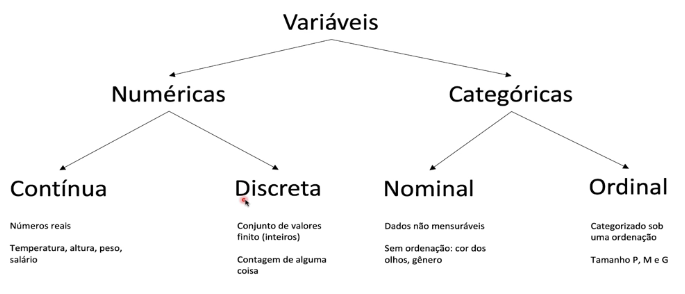

In [140]:
data_census = pd.read_csv('census.csv')

In [141]:
data_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [142]:
data_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [143]:
data_census.isnull().value_counts()

age    workclass  final-weight  education  education-num  marital-status  occupation  relationship  race   sex    capital-gain  capital-loos  hour-per-week  native-country  income
False  False      False         False      False          False           False       False         False  False  False         False         False          False           False     32561
dtype: int64

## Vizualização dos Dados

In [144]:
np.unique(data_census['income'])

array([' <=50K', ' >50K'], dtype=object)

In [145]:
data_census['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [146]:
#sns.countplot(x = data_census['income'])

In [147]:
#plt.hist(x = data_census['age']);

In [148]:
#plt.hist(x = data_census['education-num']);

In [149]:
#plt.hist(x = data_census['hour-per-week']);

In [150]:
#grafico = px.treemap(data_census, path=['workclass', 'age']);
#grafico.show()

In [151]:
#grafico = px.treemap(data_census, path=['occupation', 'relationship', 'age']);
#grafico.show()

In [152]:
#grafico = px.parallel_categories(data_census, dimensions=['occupation', 'relationship'])
#grafico.show()

In [153]:
#grafico = px.parallel_categories(data_census, dimensions=['workclass','occupation', 'income'])
#grafico.show()

In [154]:
#grafico = px.parallel_categories(data_census, dimensions=['education', 'income'])
#grafico.show()

## Divisão Entre Pevisores e Classes 

In [155]:
data_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [156]:
x_census = data_census.iloc[:, 0:14].values

In [157]:
y_census = data_census.iloc[:, 14].values

In [158]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

## Tratamento de Atributos Categóticos

### LabelEncoder

In [159]:
label_enconder_test = LabelEncoder()

In [160]:
test = label_enconder_test.fit_transform(x_census[:,1])

In [161]:
test

array([7, 6, 4, ..., 4, 4, 5])

In [162]:
label_enconder_workclass = LabelEncoder()
label_enconder_education = LabelEncoder()
label_enconder_marital = LabelEncoder()
label_enconder_occupation = LabelEncoder()
label_enconder_relationship = LabelEncoder()
label_enconder_race = LabelEncoder()
label_enconder_sex = LabelEncoder()
label_enconder_country = LabelEncoder()

In [163]:
x_census[:,1] = label_enconder_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_enconder_education.fit_transform(x_census[:,3])
x_census[:,5] = label_enconder_marital.fit_transform(x_census[:,5])
x_census[:,6] = label_enconder_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_enconder_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_enconder_race.fit_transform(x_census[:,8])
x_census[:,9] = label_enconder_sex.fit_transform(x_census[:,9])
x_census[:,13]  = label_enconder_country.fit_transform(x_census[:,13])


### OneHotEnconder

In [164]:
# Carro
# Gol   Pálio   Uno
# 1     2       3

# Gol   1 0 0
# Pálio 0 1 0
# Uo    0 0 1

In [167]:
len(data_census['workclass'].value_counts())

9

In [165]:
data_census['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [171]:
onehotenconder_census = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough') #remainder='passthrough' não apaga os outros atributos

In [174]:
x_census = onehotenconder_census.fit_transform(x_census).toarray()

In [175]:
x_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [177]:
x_census.shape

(32561, 108)